In [1]:
import pandas as pd
import networkx as nx
from collections import defaultdict
import heapq
import functions 
import matplotlib.pyplot as plt

In [16]:
from importlib import reload
reload(functions)

<module 'functions' from 'c:\\Users\\matti\\Documents\\ADM\\HW5\\ADM_HW05\\functions.py'>

In [3]:
df = pd.read_csv(r"AirportsClean.csv")

In [ ]:
# Ottengo una lista di tutti gli aereoporti distinti
airports = pd.concat([df['Origin_airport'], df['Destination_airport']]).drop_duplicates()

In [5]:
# We don't need the entire dataset, so we create a DataFrame composed only of the columns Origin_airport, Destination_airport, Distance, and Count.
## We notice that sometimes, for the same Origin_airport and Destination_airport pair, there are different distance values 
## (likely due to measurement errors or changes in territories over time). 
## To resolve this, we replace the distance value with the most frequent distance value (the mode) for each Origin_airport and Destination_airport pair.
df_util = functions.build_df_for_network(df)

# Construction of the directed graph with distances (for centrality measures, the distance will be used as the weight of the edges)
flight_network = functions.build_graph(df_util)

In [6]:
df_util.head()

,Origin_airport,Destination_airport,Distance
0,MHK,AMW,254
1,EUG,RDM,103
4,MFR,RDM,156
9,SEA,RDM,228
14,PDX,RDM,116


Cella in qui spieghiamo cosa è stato fatto

In [7]:
functions.analyze_centrality(flight_network, "YIP")

{'Betweenness Centrality': 0.32333452216274433,
 'Closeness Centrality': 0.00108300373460128,
 'Degree Centrality': 665,
 'PageRank': 0.011968947291634198}

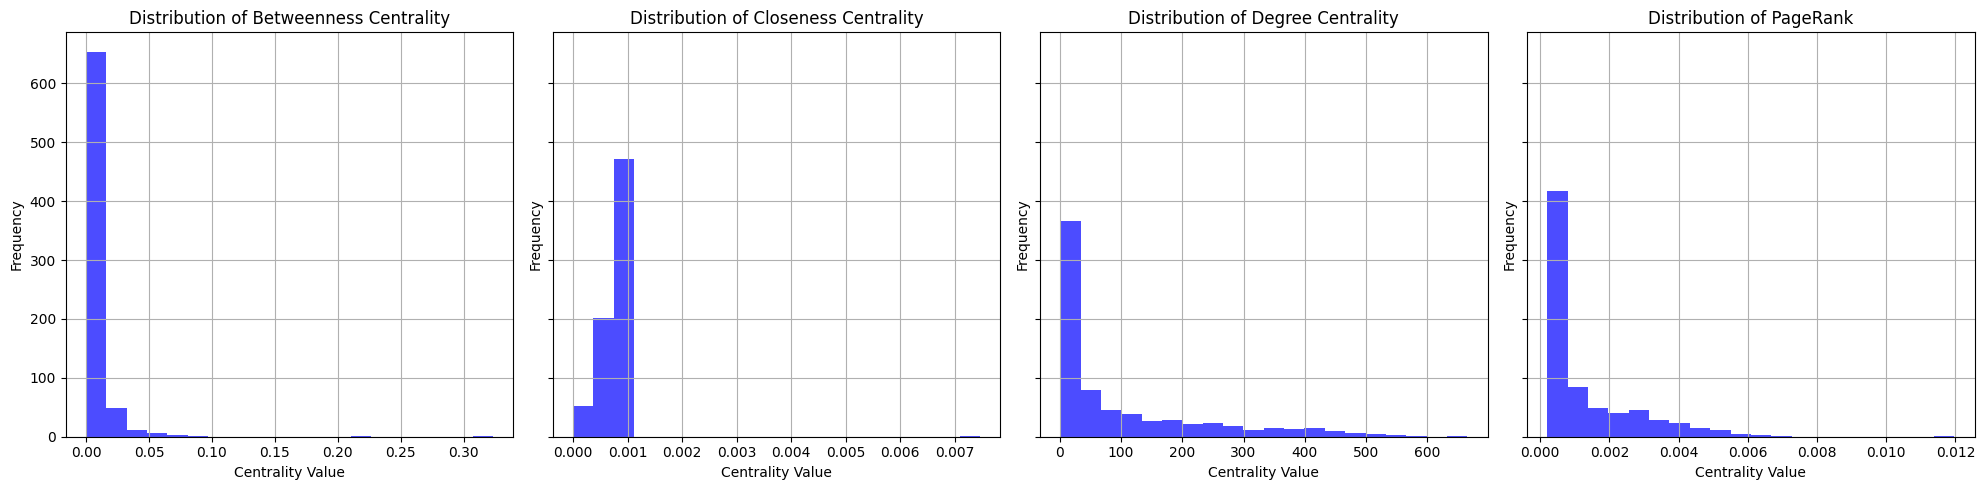

Top 5 airports for Betweenness Centrality: {'YIP': 0.32333452216274433, 'WFB': 0.3079985170796882, 'KTN': 0.21905510499998557, 'MTN': 0.0924843273053154, 'ATL': 0.07932240326645668}
Top 5 airports for Closeness Centrality: {'FVS': 0.007462686567164179, 'STL': 0.0010968246383736588, 'CMI': 0.0010956331194240101, 'DEC': 0.0010939293881731843, 'SPI': 0.001093278117891566}
Top 5 airports for Degree Centrality: {'YIP': 665, 'MSP': 583, 'MEM': 564, 'ATL': 539, 'MCI': 539}
Top 5 airports for PageRank: {'YIP': 0.011968947291634198, 'SHV': 0.007198937602747061, 'MSP': 0.007116248610591993, 'MEM': 0.006639978857497354, 'MCI': 0.006622748106211989}


In [17]:
top_airports = functions.compare_centralities(flight_network)
for centrality, airports in top_airports.items():
    print(f"Top 5 airports for {centrality}: {airports}")


Ask LLM (eg. ChatGPT) to suggest alternative centrality measures that might be relevant to this task. How can you check that the results given by the LLM are trustable?


La Katz Centrality è una misura di centralità usata per identificare l'importanza di un nodo in una rete, prendendo in considerazione sia il numero di connessioni dirette (ad esempio, i vicini immediati) sia le connessioni indirette (i vicini dei vicini, e così via).

Caratteristiche principali
- Un nodo è importante non solo se ha molte connessioni, ma anche se è connesso a nodi importanti (simile alla Eigenvector Centrality).
- Include un bias: La Katz Centrality aggiunge un termine di bias (detto beta) per garantire che anche nodi con poche connessioni abbiano un punteggio positivo. Questo è utile per grafi disconnessi o reti sparse.


La **Katz Centrality** di un nodo \( v \) è definita come:

$$
C_k(v) = \alpha \sum_{u \in N(v)} C_k(u) + \beta
$$

Dove:
- \( C_k(v) \): La Katz Centrality del nodo \( v \).
- \( N(v) \): I vicini del nodo \( v \) (i nodi direttamente collegati a \( v \)).
- \( alpha \): Un fattore di attenuazione che controlla l'influenza delle connessioni indirette.
- \( beta \): Un termine di bias per garantire che i nodi senza connessioni abbiano un punteggio positivo.

In [250]:
nx.katz_centrality(G, alpha=0.01, beta=1.0, max_iter=1000, tol=1e-6, weight='weight')

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')